In [ ]:
#https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

In [2]:
import re
import string

from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

from nltk.stem import PorterStemmer 
import nltk
from nltk.probability import FreqDist

In [3]:
from currentsapi import CurrentsAPI

In [4]:
api = CurrentsAPI(api_key='dRWQojBGS4lfWFNX2CpLc2LjfKEwgxVbj5PC2eKdd7cOv1qL')

In [5]:
news_api = api.latest_news()

In [6]:
news_api

{'status': 'ok',
 'news': [{'id': '8b172e7d-0965-435b-a923-0fc7402ae803',
   'title': "Soviet-style autocrat on Europe's doorstep",
   'description': 'Strongman Alexander Lukashenko, who has ruled over ex-Soviet Belarus for nearly three decades, is facing down the greatest challenge to his rule ahead of presidential elections on Sunday. In the run-up to the vote in which Lukashenko will seek a sixth term, protests have erupted across the country s...',
   'url': 'http://m.digitaljournal.com/news/world/lukashenko-soviet-style-autocrat-on-europe-s-doorstep/article/576099',
   'author': 'digitaljournal',
   'image': 'http://www.digitaljournal.com/img/1/0/4/8/0/9/3/i/4/7/0/p-medium/8067d15eabe195800ec176afd698cd31e763d1f6_1.jpg',
   'language': 'en',
   'category': ['art'],
   'published': '2020-08-09 03:50:11 +0000'},
  {'id': '9bcc4efa-a01b-4d6d-b997-43d76a9d166e',
   'title': 'Nagasaki marks 75 years since atomic bombing',
   'description': 'The Japanese city of Nagasaki on Sunday comme

In [7]:
news_api['news'][0]['description']

'Strongman Alexander Lukashenko, who has ruled over ex-Soviet Belarus for nearly three decades, is facing down the greatest challenge to his rule ahead of presidential elections on Sunday. In the run-up to the vote in which Lukashenko will seek a sixth term, protests have erupted across the country s...'

In [8]:
stopwords = set(STOPWORDS) 
long_string = ''
sentence = []
sentences = []
all_sentences =[]
ps = PorterStemmer() 
#stop_words = set(stopwords.words('english')) 

for item in news_api['news']:
    # remove  numbers
    clean_sentence =  re.sub(r"\d+", "", item['description'])
    
    #Remove punctuation
    clean_sentence =  clean_sentence.translate(str.maketrans('', '', string.punctuation))
    #Remove whitespaces and lower case
    
    clean_sentence = clean_sentence.strip().lower()
    # tokenized
    tokens = word_tokenize( clean_sentence)
    # translate word to its root
    tokens = [ps.stem(w) for w in tokens]
    # remove stop word
    tokens = [w for w in  tokens if not w in stopwords]
   
    long_string += " ".join(tokens)+" "
    all_sentences.extend(tokens)
    sentences.append ( tokens)

In [9]:
data_analysis = nltk.FreqDist(all_sentences)

filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 6])



In [10]:
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))

account: 1
administr: 3
agricultur: 1
alexand: 1
alongsid: 1
alreadi: 1
anniversari: 1
appoint: 1
australian: 1
awardwin: 1
blenheim: 1
briefli: 1
bulldoz: 1
buttress: 1
cemeteri: 1
ceremoni: 1
challeng: 1
championship: 1
citizen: 1
commemor: 1
commiss: 1
commission: 1
committe: 1
complac: 1
continu: 1
contributor: 1
controversi: 1
coronaviru: 3
council: 1
countri: 2
courtesi: 1
crossbord: 1
destruct: 1
diehard: 1
dismiss: 1
dogfight: 1
earlier: 1
economi: 2
egyptian: 1
enterpris: 1
exsoviet: 1
flatten: 1
foreign: 1
freshli: 1
greatest: 1
harbour: 1
harvest: 1
highest: 1
highway: 1
incident: 1
indonesia: 1
indonesian: 2
institut: 1
intellasia: 7
irregular: 1
jakarta: 3
japanes: 1
journal: 1
kilogram: 1
lockdown: 1
lollipop: 1
longtim: 1
lukashenko: 2
malaysia: 2
malaysian: 1
marijuana: 1
maritim: 1
mausoleum: 1
mercuri: 2
mileston: 2
million: 1
ministri: 1
motherofthre: 1
nagasaki: 1
nationwid: 1
nayland: 1
onboard: 1
paddock: 1
pandemichit: 1
penalti: 1
perkasa: 1
possibl: 1
predict: 

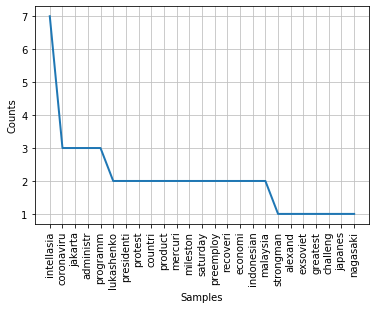

In [11]:
data_analysis = nltk.FreqDist(filter_words)
 
data_analysis.plot(25, cumulative=False)

In [12]:

def plot_graph(words):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

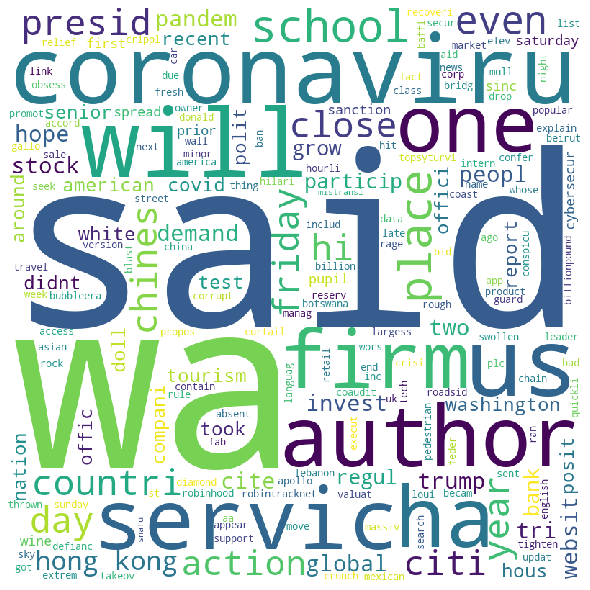

In [131]:
plot_graph(long_string)